Pyber Ride Sharing Company Analysis by Greg Roschel
--------------------------------------------------------------------------------

In [4]:
# Define all Dependencies

# Include this line for interactive plots in Matplotlib
%matplotlib inline

# All other Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Read/Load all files

# File to Load
ride_data_csvpath = os.path.join('C:', '/', 'Users', 'greg_', 'Pyber-Ride-Sharing-Co-Analysis', 'ride_data.csv')
city_data_csvpath = os.path.join('C:', '/', 'Users', 'greg_', 'Pyber-Ride-Sharing-Co-Analysis', 'city_data.csv')

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data_csvpath)
city_data_df = pd.read_csv(city_data_csvpath)

# Combine the data into a single dataset
ride_and_city_data_df = pd.merge(ride_data_df, city_data_df, on="city", how="outer")

# Display the data table for preview
ride_and_city_data_df.head(10)

# Create, Cleanup & Prepare a df for processing for charts
city_type_group = ride_and_city_data_df.groupby(["city"])
city_type_df = pd.DataFrame(city_type_group["city"].first())
city_type_df["date"] = city_type_group["date"].first()
city_type_df["avg_fare"] = city_type_group["fare"].mean()
city_type_df["avg_fare"] = city_type_df["avg_fare"].map("{:.0f}".format)
city_type_df["ride_id"] = city_type_group["ride_id"].count()
city_type_df = city_type_df.rename(columns={"ride_id":"ride_id_count"})
city_type_df["driver_count"] = city_type_group["driver_count"].first()
city_type_df["type"] = city_type_group["type"].first()
city_type_df = city_type_df.drop(["city"], axis=1) 
city_type_df.head(10)

,date,avg_fare,ride_id_count,driver_count,type
city,,,,,
Amandaburgh,2018-03-05 02:15:38,25,18,12,Urban
Barajasview,2018-01-15 02:59:07,25,22,26,Urban
Barronchester,2018-01-27 03:08:01,36,16,11,Suburban
Bethanyland,2018-04-01 22:04:35,33,18,22,Suburban
Bradshawfurt,2018-03-06 21:44:53,40,10,7,Rural
Brandonfort,2018-01-14 12:35:27,35,19,10,Suburban
Carriemouth,2018-02-25 08:26:25,28,27,52,Urban
Christopherfurt,2018-04-17 02:25:49,25,27,41,Urban
Colemanland,2018-04-20 02:52:45,31,22,23,Suburban


## Bubble Plot of Ride Sharing Data

Preliminary Counts:
-------------------
There are a Total of 120 cities in our dataset
66 are Urban cities
36 are Suburban cities
18 are Rural cities

There are 2,405 Urban drivers
There are 490 Suburban drivers
There are 78 Rural drivers


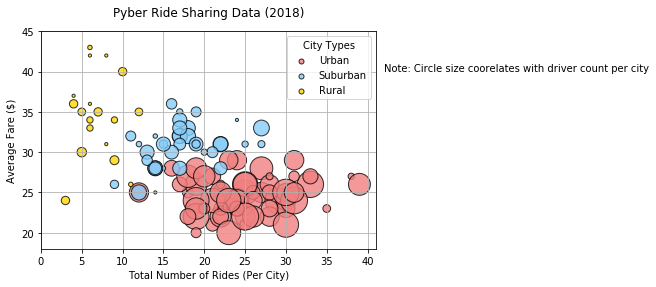

In [34]:
# Obtain the x and y coordinates for each of the three city types
urban_df = city_type_df.loc[city_type_df["type"] == "Urban"]
suburban_df = city_type_df.loc[city_type_df["type"] == "Suburban"]
rural_df = city_type_df.loc[city_type_df["type"] == "Rural"]

# Print some preliminary data from the above
print("Preliminary Counts:")
print("-------------------")
print("There are a Total of " + str(city_type_df["type"].count()) + " cities in our dataset")
print(str(urban_df["type"].count()) + " are Urban cities")
print(str(suburban_df["type"].count()) + " are Suburban cities")
print(str(rural_df["type"].count()) + " are Rural cities")

# x_axis = Total Number of Rides (Per City)
x_urban = urban_df["ride_id_count"]
x_suburban = suburban_df["ride_id_count"]
x_rural = rural_df["ride_id_count"]

# y_axis = Average Fare ($)
y_urban = urban_df["avg_fare"]
y_suburban = suburban_df["avg_fare"]
y_rural = rural_df["avg_fare"]

# Get driver count per city for bubble size (s=) on plot
# I did the "times 10" because all of the circles were too small & the plot did not look pretty
urban_dc = (urban_df["driver_count"] * 10)
suburban_dc = (suburban_df["driver_count"] * 10)
rural_dc = (rural_df["driver_count"] * 10)

# Print some more preliminary data from the above
urban_dc_fmt = format(urban_df["driver_count"].sum(), ",d")
suburban_dc_fmt = format(suburban_df["driver_count"].sum(), ",d")
rural_dc_fmt = format(rural_df["driver_count"].sum(), ",d")
print()
print("There are " + str(urban_dc_fmt) + " Urban drivers")
print("There are " + str(suburban_dc_fmt) + " Suburban drivers")
print("There are " + str(rural_dc_fmt) + " Rural drivers")

# Incorporate the other graph properties
# x & y axis Limits
plt.xlim(0, city_type_df["ride_id_count"].max() + 2) 
city_type_df["avg_fare"] = pd.to_numeric(city_type_df["avg_fare"])
plt.ylim(city_type_df["avg_fare"].min() - 2, city_type_df["avg_fare"].max() + 2)
# Grid
plt.grid()
# Title and x & y axis labels
plt.title("Pyber Ride Sharing Data (2018)", pad=15) # pad moves the title away from the top axis so it looks better
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Build the scatter plots for each city types
urban_handle = plt.scatter(x=x_urban, y=y_urban, marker="o", color="lightcoral", edgecolors="black", s=urban_dc, alpha=0.8, label="Urban")
suburban_handle = plt.scatter(x=x_suburban, y=y_suburban, marker="o", color="lightskyblue", edgecolors="black", s=suburban_dc, alpha=0.8, label="Suburban")
rural_handle = plt.scatter(x=x_rural, y=y_rural, marker="o", color="gold", edgecolors="black", s=rural_dc, alpha=0.8, label="Rural")
# Set all of the legend markers to be the same size
lgnd = plt.legend(handles=[urban_handle, suburban_handle, rural_handle], title="City Types", loc="best")
for handle in lgnd.legendHandles:
    handle.set_sizes([25.0])

# Incorporate a text label regarding circle size
plt.text(42, 40, "Note: Circle size coorelates with driver count per city")

# Save Figure
plt.savefig("ridesharingdata.png")

# Plot it
plt.show() 

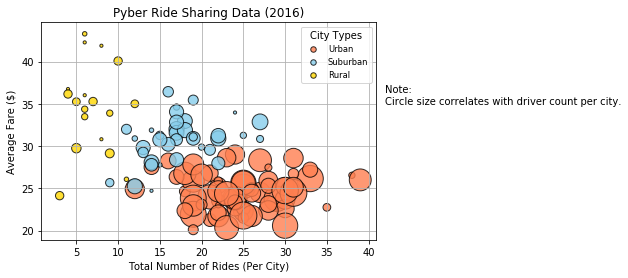

In [3]:
# Show plot
# plt.show()

## Total Fares by City Type

ValueError: 'explode' must be of length 'x'

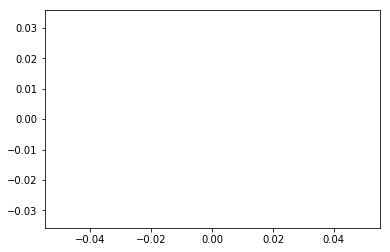

In [96]:
# Calculate Type Percents
# Create, Cleanup & Prepare a df for processing for charts
tfbct_group = ride_and_city_data_df.groupby(["type"])
tfbct_df = pd.DataFrame(tfbct_group["fare"].sum())
tfbct_df["type"] = tfbct_group["type"].first()
tfbct_df["pct"] = (tfbct_df["fare"] / (tfbct_df["fare"].sum()) * 100)
tfbct_df.head()

# Build Pie Chart
# Create data
# Labels for the sections of our pie chart
# labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]
labels = [tfbct_df["type"]]
labels

# The values of each section of the pie chart
# sizes = [220, 95, 80, 100]
sizes = [tfbct_df["pct"]]
sizes

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]
colors = ["gold", "lightskyblue", "lightcoral"]
colors
          
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal") 
          
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)         

# Save Figure
# plt.savefig("faresbycitytype.png")

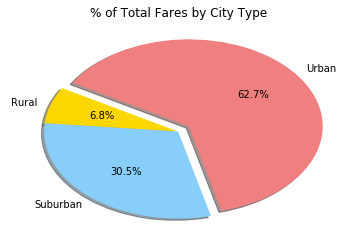

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
# plt.savefig("ridesbycitytype.png")

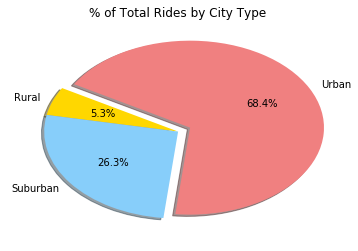

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
# plt.savefig("driversbycitytype.png")

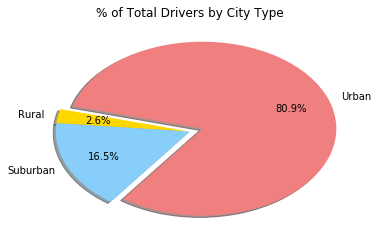

In [6]:
# Show Figure
plt.show()